In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysis-of-us-airline-twitter-data/Airline-Sentiment-2-w-AA.csv


In [2]:
df = pd.read_csv("/kaggle/input/sentiment-analysis-of-us-airline-twitter-data/Airline-Sentiment-2-w-AA.csv")
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,index,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,...,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,...,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,...,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,...,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,...,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,...,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         14640 non-null  int64  
 1   _unit_id                      14640 non-null  int64  
 2   _golden                       14640 non-null  bool   
 3   _unit_state                   14640 non-null  object 
 4   _trusted_judgments            14640 non-null  int64  
 5   _last_judgment_at             14584 non-null  object 
 6   airline_sentiment             14640 non-null  object 
 7   airline_sentiment:confidence  14640 non-null  float64
 8   negativereason                9178 non-null   object 
 9   negativereason:confidence     10522 non-null  float64
 10  airline                       14640 non-null  object 
 11  airline_sentiment_gold        40 non-null     object 
 12  name                          14640 non-null  object 
 13  n

In [4]:
df.isnull().sum()

index                               0
_unit_id                            0
_golden                             0
_unit_state                         0
_trusted_judgments                  0
_last_judgment_at                  56
airline_sentiment                   0
airline_sentiment:confidence        0
negativereason                   5462
negativereason:confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_id                            0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
df = df[['airline_sentiment', 'text']]

In [8]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    return " ".join(filtered_tokens)

df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text']].head()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,clean_text
0,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said
1,@VirginAmerica plus you've added commercials t...,virginamerica plus youve added commercials exp...
2,@VirginAmerica I didn't today... Must mean I n...,virginamerica didnt today must mean need take ...
3,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...
4,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing


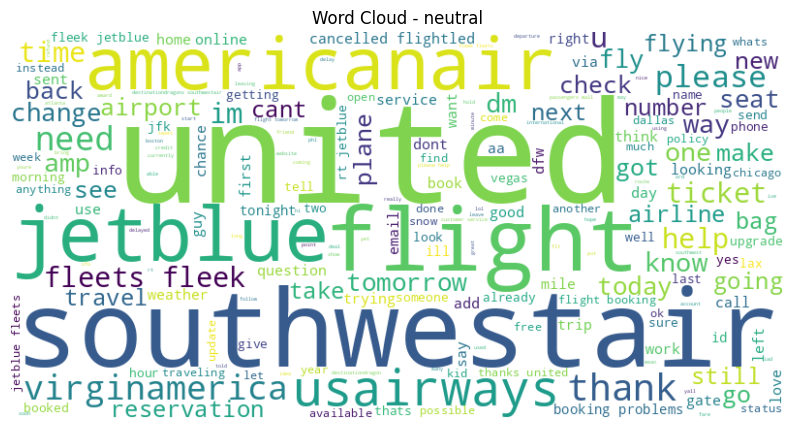

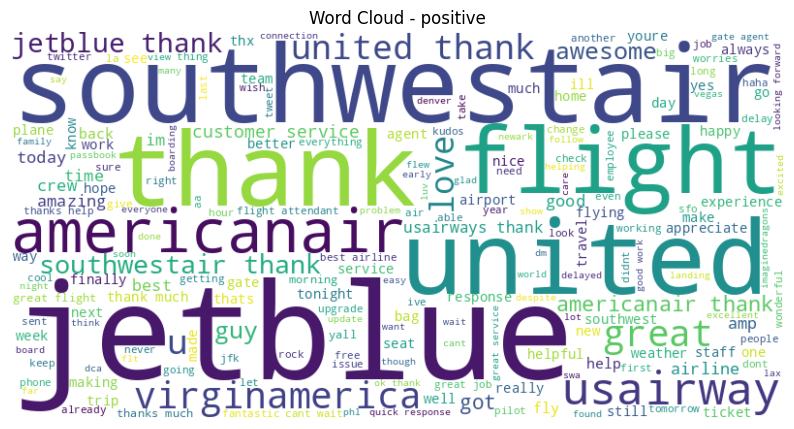

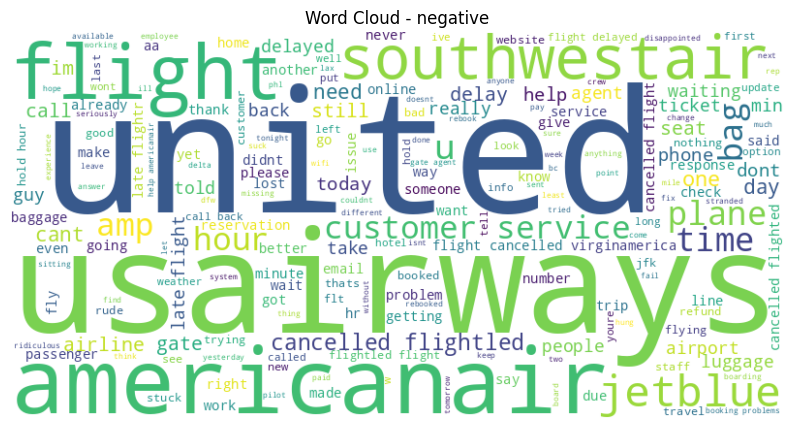

In [9]:
from wordcloud import WordCloud

for sentiment in df['airline_sentiment'].unique():
    plt.figure(figsize=(10,8))
    wc = WordCloud(width=800, height=400, background_color='white').generate(
        " ".join(df[df['airline_sentiment'] == sentiment]['clean_text'])
    )
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f"Word Cloud - {sentiment}")
    plt.axis("off")
    plt.show()

In [10]:
df['label'] = df['airline_sentiment'].map({'negative': 0, "neutral": 1, "positive": 2})
df[['airline_sentiment', 'label']].head()

,airline_sentiment,label
0,neutral,1
1,positive,2
2,neutral,1
3,negative,0
4,negative,0


In [11]:
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

[[1776   79   34]
 [ 257  283   40]
 [ 118   53  288]]
              precision    recall  f1-score   support

    negative       0.83      0.94      0.88      1889
     neutral       0.68      0.49      0.57       580
    positive       0.80      0.63      0.70       459

    accuracy                           0.80      2928
   macro avg       0.77      0.69      0.72      2928
weighted avg       0.79      0.80      0.79      2928



In [14]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

print("SVM Classification report:")
print(classification_report(y_test, svm_pred, target_names=['negative', 'neutral', 'positive']))

SVM Classification report:
              precision    recall  f1-score   support

    negative       0.84      0.90      0.87      1889
     neutral       0.60      0.50      0.55       580
    positive       0.75      0.68      0.71       459

    accuracy                           0.79      2928
   macro avg       0.73      0.69      0.71      2928
weighted avg       0.78      0.79      0.78      2928



In [15]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metrics='mlogloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_pred, target_names=['negative', 'neutral', 'positive']))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [15:59:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "eval_metrics" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

    negative       0.81      0.93      0.86      1889
     neutral       0.61      0.41      0.49       580
    positive       0.74      0.61      0.67       459

    accuracy                           0.77      2928
   macro avg       0.72      0.65      0.67      2928
weighted avg       0.76      0.77      0.76      2928



In [16]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.title(f'{model_name} – Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


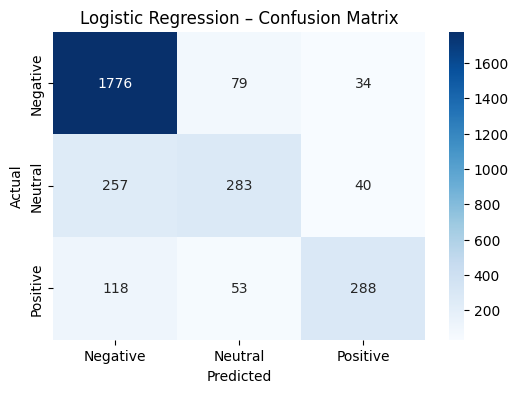

In [17]:
plot_confusion_matrix(y_test, y_pred, "Logistic Regression")


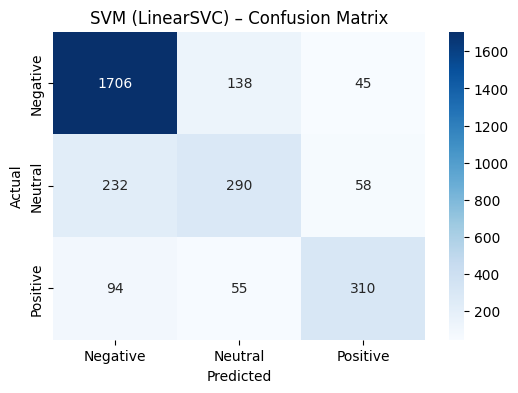

In [18]:
plot_confusion_matrix(y_test, svm_pred, "SVM (LinearSVC)")


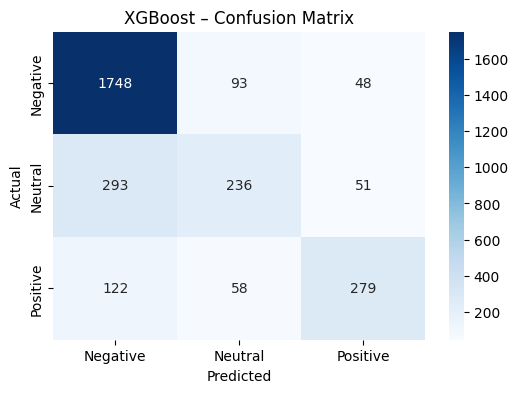

In [19]:
plot_confusion_matrix(y_test, xgb_pred, "XGBoost")


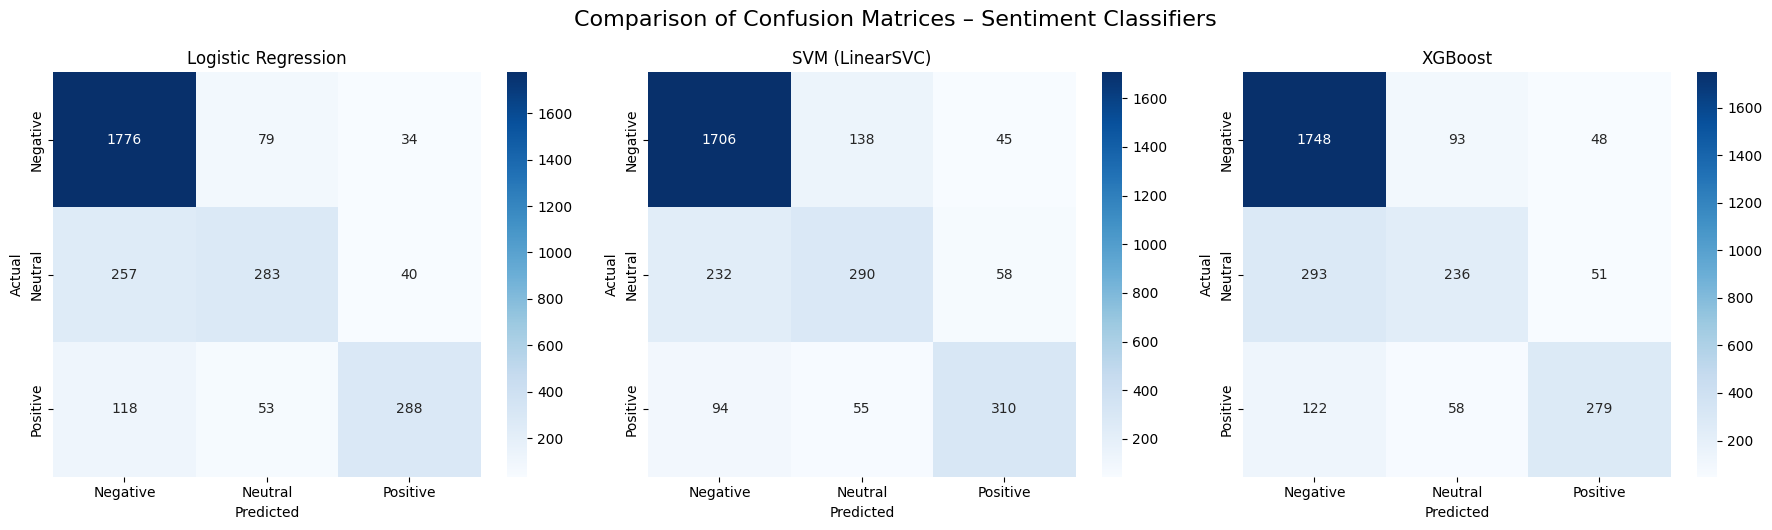

In [20]:
def plot_all_confusion_matrices(y_true, y_preds, model_names, class_names):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    for i, (y_pred, name) in enumerate(zip(y_preds, model_names)):
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_names, yticklabels=class_names,
                    ax=axes[i])
        axes[i].set_title(f'{name}')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')

    plt.tight_layout()
    plt.suptitle('Comparison of Confusion Matrices – Sentiment Classifiers', fontsize=16, y=1.05)
    plt.show()

# Run this with your model outputs:
y_preds = [y_pred, svm_pred, xgb_pred]
model_names = ['Logistic Regression', 'SVM (LinearSVC)', 'XGBoost']
class_names = ['Negative', 'Neutral', 'Positive']

plot_all_confusion_matrices(y_test, y_preds, model_names, class_names)

In [21]:
plt.savefig("sentiment_model_comparison.png", dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [22]:
df.to_csv("us-airline.csv")